# **Basic Trends in Academic Publications**
## Exploring Publication Metrics with *OpenAlex* 
### A step-by-step walkthrough

OpenAlex is a free and open catalog of the global research system, providing structured data on academic publications, institutions, and authors.

This notebook includes the following basic first analyses:
- Number of publications per year for a selected institution 
- Number of articles per year for a selected institution 

### Analysis 1: Number of Publications per year for a selected institution

In this example we're comparing the number of publications in the past ten years, but you can adapt this for your analysis.

We cover:
- Data fetching using OpenAlex API
- Data processing into a usable format
- Visualization of trends in publication counts (bar and line charts)

> Note: If you want to perform the exact same analysis, then you only have to modify Step 7 to choose the institution you want or adjust/add other parameters.

##### Step 1.1: Imports
To include all necessary imports for setup, you need to install the `requirements.txt` file first. Ensure you're in the right repository and then paste the following command into your terminal: `$ pip install -r requirements.txt`

We need these libraries for:
- `requests`: To make API calls
- `pandas`: To process and manipulate data
- `datetime`: To calculate year ranges
- `matplotlib`: For visualizing data
- `open_colors`: Get colors from open_colors.py

In [49]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from open_colors import colors

##### Step 1.2: Response Validation
This function checks the API response's status code. If it is not 200, it raises an error with details about the failure.

In [50]:
def validate_response(response):
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to fetch data. Status code for {response.url}: {response.status_code}")

##### Step 1.3: Build API Parameters
This function constructs the query parameters:
- `start_year` and `current_year`: Define the publication year range.
- `institution_id`: Specifies the institution to filter by.
- `use_lineage`: Gives the option to include child institutions.

In [51]:
def build_params(start_year, current_year, institution_id=None, use_lineage=False):
    if use_lineage:
        filter_key = "authorships.institutions.lineage.id" # includes child institutions
    else:
        filter_key = "institutions.id"
    # Filter by institution and publication year range: 
    return {
        "filter": f"{filter_key}:{institution_id},publication_year:{start_year}-{current_year}",
        "group_by": "publication_year"
    }

##### Step 1.4: Fetch Data from OpenAlex
- This function sends a GET request to the OpenAlex API using the constructed parameters.  
- It prints the request URL (for debugging) and validates the response.
> Note: We're always printing the URLs so that you can check the data if it's correct, alternatively you can always compare with the OpenAlex User Interface (https://openalex.org/) 

In [52]:
def fetch_data(base_url, params):
    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.url}")
    return validate_response(response)

##### Step 1.5: Process Data
This function converts the API's grouped results into a pandas DataFrame. The DataFrame contains:
- `Year`: Publication years.
- `Number of Publications`: The count of publications for each year.

In [53]:
def process_data(grouped_results):
    # Extract year and number of publications from the grouped results
    years = [result["key"] for result in grouped_results]
    publications = [result["count"] for result in grouped_results]
    
    # Create a DataFrame
    df = pd.DataFrame({"Year": years, "Number of Publications": publications})
    df = df.sort_values(by="Year", ascending=True).reset_index(drop=True)
    return df

##### Step 1.6: Create Visualization Plots
> Note: Essentially you can choose any kind of visualization you think suits your analysis. Here, we provide possible examples, which you can custom as well:

**Option 1: Bar Chart**
- On the x-axis we have the years, on the y-axis the number of publications
- Each bar for each year is labeled with the exact count

In [54]:
def plot_bar_chart(df, title, color=colors["green"][9]):
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.bar(df["Year"], df["Number of Publications"], color=color)

    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Number of Publications", fontsize=16)
    ax.set_xticks(df["Year"])
    ax.set_xticklabels(df["Year"], rotation=45, fontsize=12)
    
    # Annotate bars with values
    for bar, value in zip(bars, df["Number of Publications"]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            value + 100,
            f"{value:,}",
            ha="center",
            va="bottom",
            fontsize=12,
            fontweight="bold",
            color=colors["gray"][9]
        )

    fig.tight_layout()
    plt.show()

**Option 2: Line Chart**
- Points labeled with publication counts.
- Optional: Gridlines for easier interpretation.

In [55]:
def plot_line_chart(df, title, line_color=colors["orange"][6], text_color=colors["gray"][9]):
    fig, ax = plt.subplots(figsize=(12, 8))
    line = ax.plot(
        df["Year"],
        df["Number of Publications"],
        color=line_color,
        marker="o",
        linestyle="-",
        linewidth=2,
        markersize=7
    )

    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Number of Publications", fontsize=16)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticks(df["Year"])
    ax.set_xticklabels(df["Year"], rotation=45, fontsize=12)

    # Annotate each point
    for x, y in zip(df["Year"], df["Number of Publications"]):
        ax.text(
            x,
            y,
            f"{y:,}",
            fontsize=12,
            fontweight="bold",
            ha="left",
            va="bottom",
            color=text_color
        )

    fig.tight_layout()
    plt.show()

##### Step 1.7: Define Parameters
Here, we specify:
- `institution_id`: The ID of the institution to analyze.
    - search on OpenAlex for your institution (https://openalex.org/institutions) and copy its ID from the URL.
    - IDs for institutions begin with “I” and are followed by 9-digits
    - E.g. in the URL "https://openalex.org/institutions/i35440088" we find i35440088 as ID for ETH Zürich.
- `start_year` and `current_year`: The range of publication years to analyze.
    - we use datetime, but you can just type in the years you want
- `use_lineage`: Whether to include child institutions or not.

In [56]:
institution_id = "I35440088" # Example: ID of ETH Züriich
base_url = "https://api.openalex.org/works"
current_year = datetime.now().year
start_year = current_year - 9
use_lineage = False

##### Step 1.8: Fetch and Process Data
We now fetch data from the API using the parameters we just defined, then process it, and preview the DataFrame.


In [57]:
params = build_params(start_year, current_year, institution_id, use_lineage)
data = fetch_data(base_url, params)
# Extract the grouped results from the response
grouped_results = data.get("group_by", [])
# Process the data into a DataFrame
df = process_data(grouped_results)
df

Request URL: https://api.openalex.org/works?filter=institutions.id%3AI35440088%2Cpublication_year%3A2016-2025&group_by=publication_year


,Year,Number of Publications
0,2016,8140
1,2017,8753
2,2018,9327
3,2019,13789
4,2020,11976
5,2021,12662
6,2022,11457
7,2023,11720
8,2024,9062
9,2025,1636


##### Step 1.9: Display Plots
**Bar Chart**

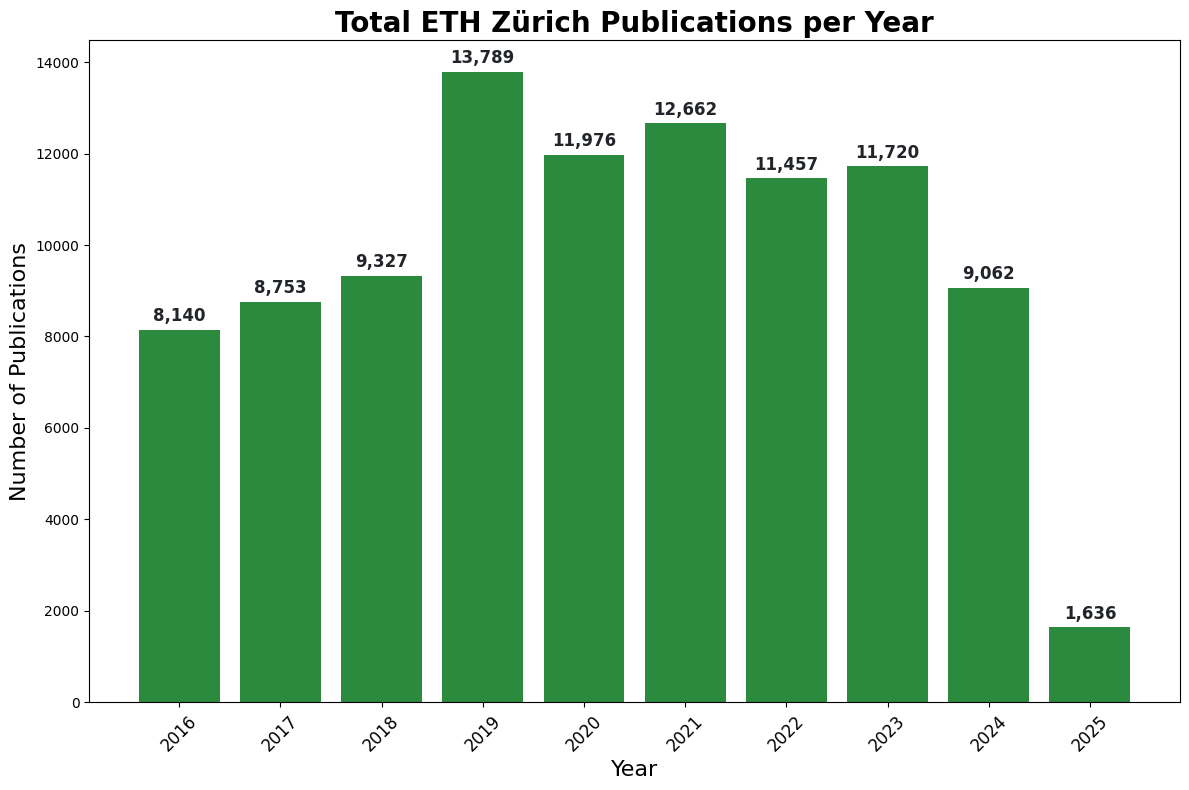

In [58]:
plot_bar_chart(df, "Total ETH Zürich Publications per Year")

**Line Chart**

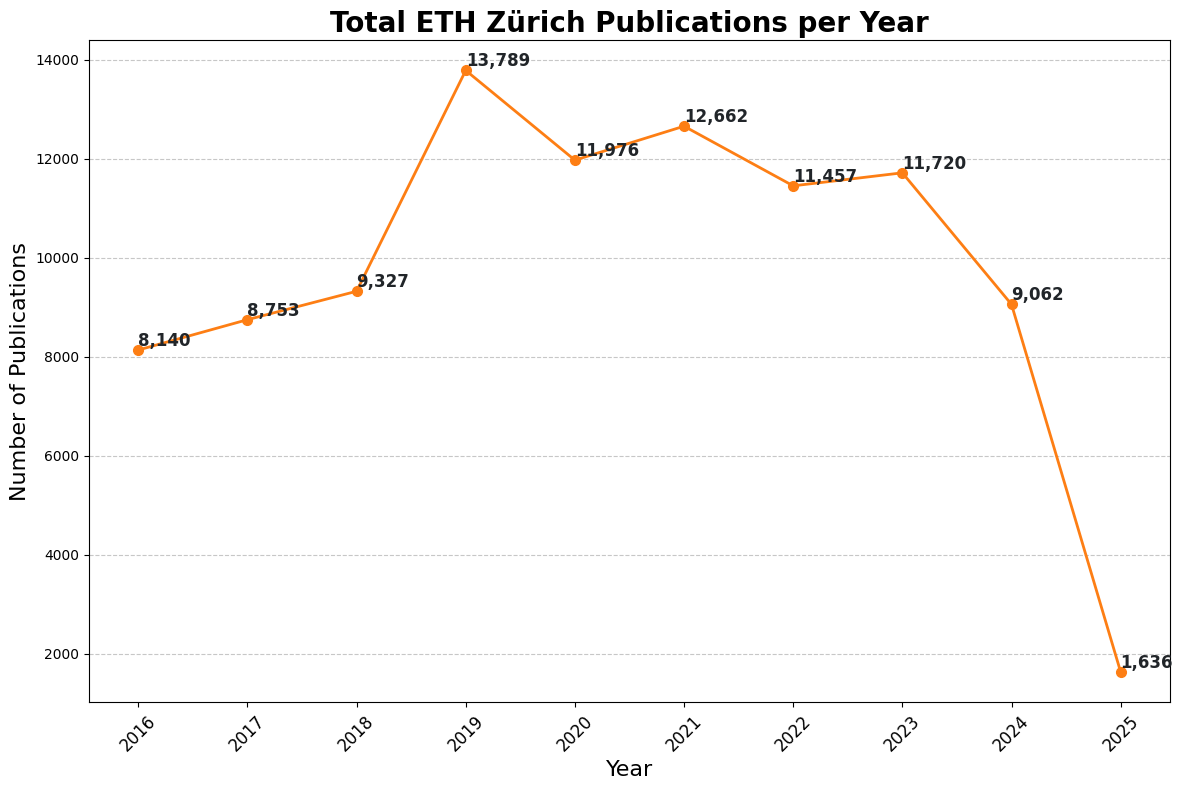

In [59]:
plot_line_chart(df, "Total ETH Zürich Publications per Year")

##### (Optional) Step 1.10:  Export to CSV
Uncomment this cell if you want to save your results in a CSV file.

In [ ]:
#df.to_csv("publication_trends.csv", index=False)

### Analysis 2: Number of Articles per year for a selected institution

In this section, we focus on publications of type **article**. 

We will reuse the parameters from above and most functions.

##### Step 2.1: Build Parameters
If you want to analyze another publication type, you can just modify `publication_type`.

Check [here](https://docs.openalex.org/api-entities/works/work-object#type) for all possible publication type values.

In [61]:
def build_params(start_year, current_year, institution_id=None, publication_type="article", use_lineage=False):
    if use_lineage:
        filter_key = "authorships.institutions.lineage.id" 
    else:
        filter_key = "institutions.id"
    
    return {
        "filter": f"{filter_key}:{institution_id},publication_year:{start_year}-{current_year},type:{publication_type}",
        "group_by": "publication_year"
    }

##### Step 2.2: Fetch Data and create a DataFrame

In [62]:
params = build_params(start_year, current_year, institution_id)
data = fetch_data(base_url, params)
grouped_results = data.get("group_by", [])
df = process_data(grouped_results)
df

Request URL: https://api.openalex.org/works?filter=institutions.id%3AI35440088%2Cpublication_year%3A2016-2025%2Ctype%3Aarticle&group_by=publication_year


,Year,Number of Publications
0,2016,6668
1,2017,6975
2,2018,7209
3,2019,7353
4,2020,8258
5,2021,8955
6,2022,7717
7,2023,7584
8,2024,6570
9,2025,1273


##### Step 2.3: Display Plots
**Bar Chart**

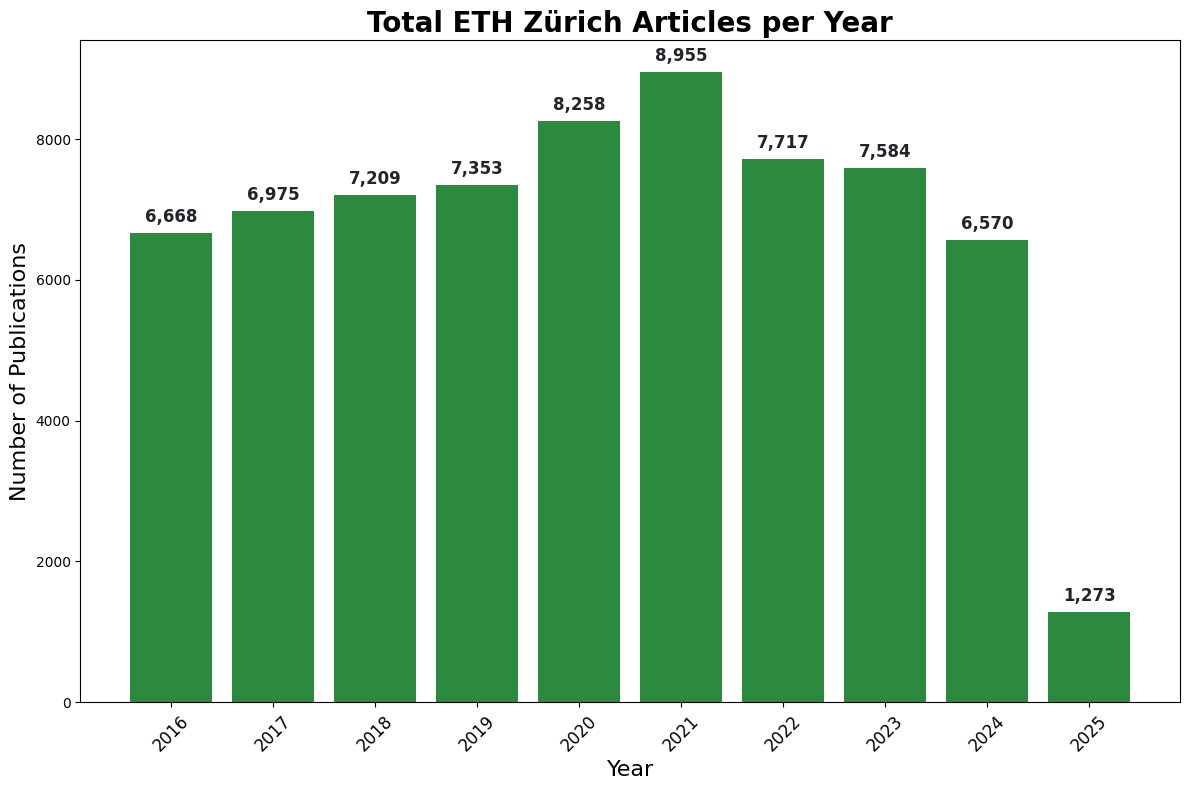

In [63]:
plot_bar_chart(df, "Total ETH Zürich Articles per Year")

**Line Chart**

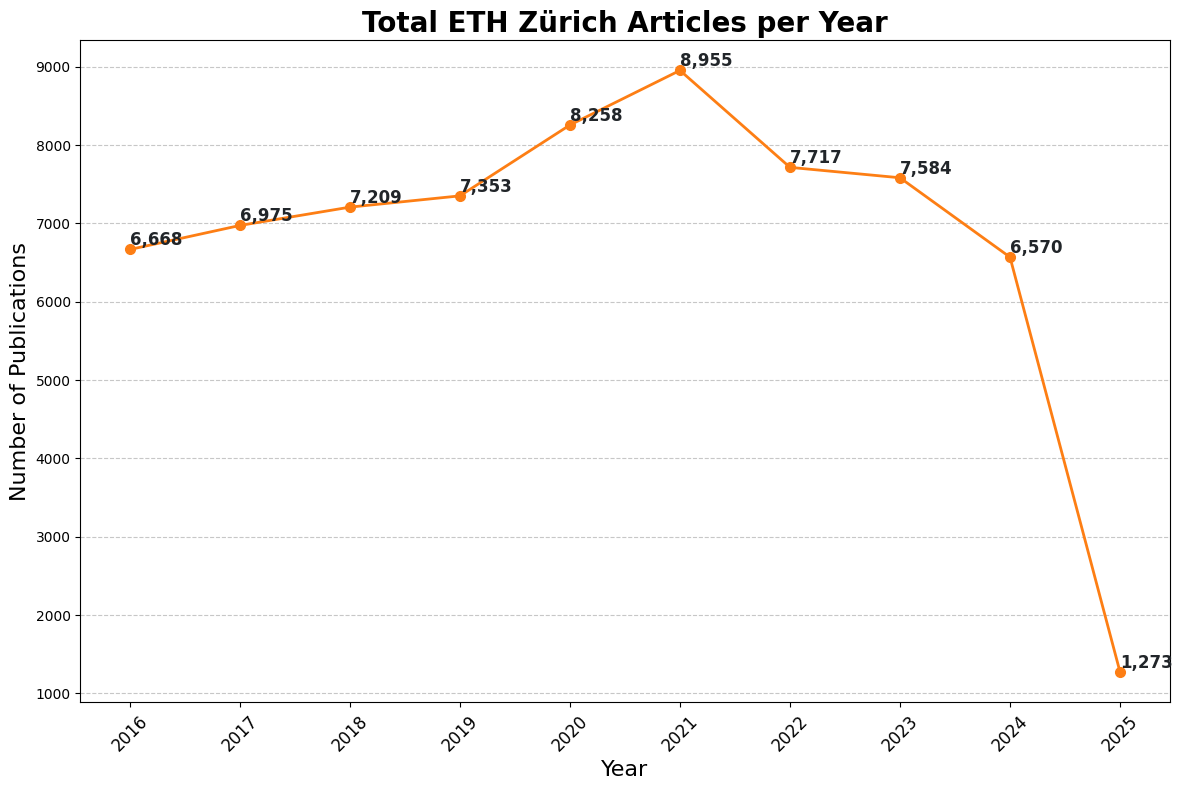

In [64]:
plot_line_chart(df, "Total ETH Zürich Articles per Year")

##### (Optional) Step 2.4: Export to CSV

In [ ]:
#df.to_csv("article_trends.csv", index=False)